<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




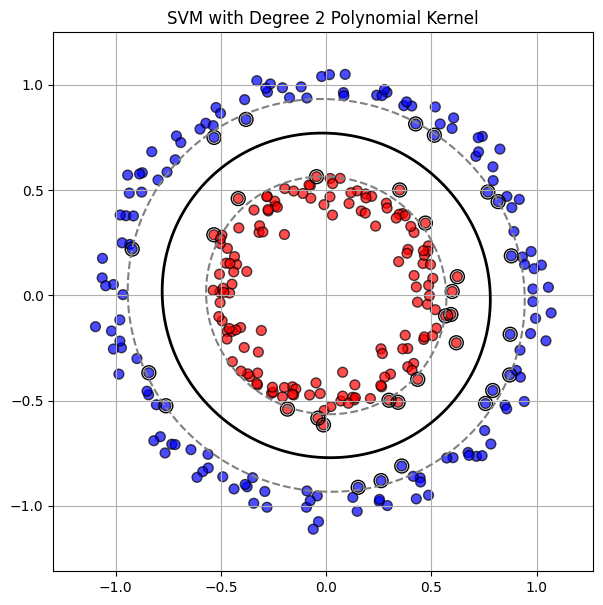

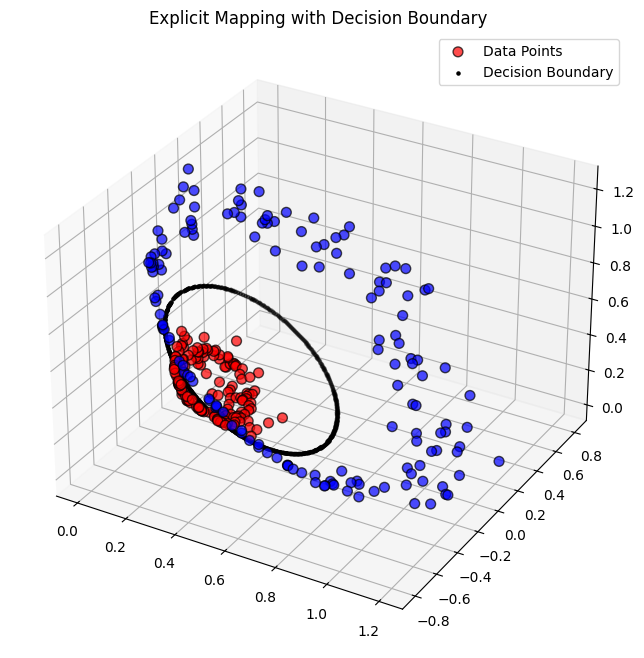

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

### Generating and visualizing dataset, SVM - exact stript from classes


# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()



# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping with Decision Boundary')


# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()



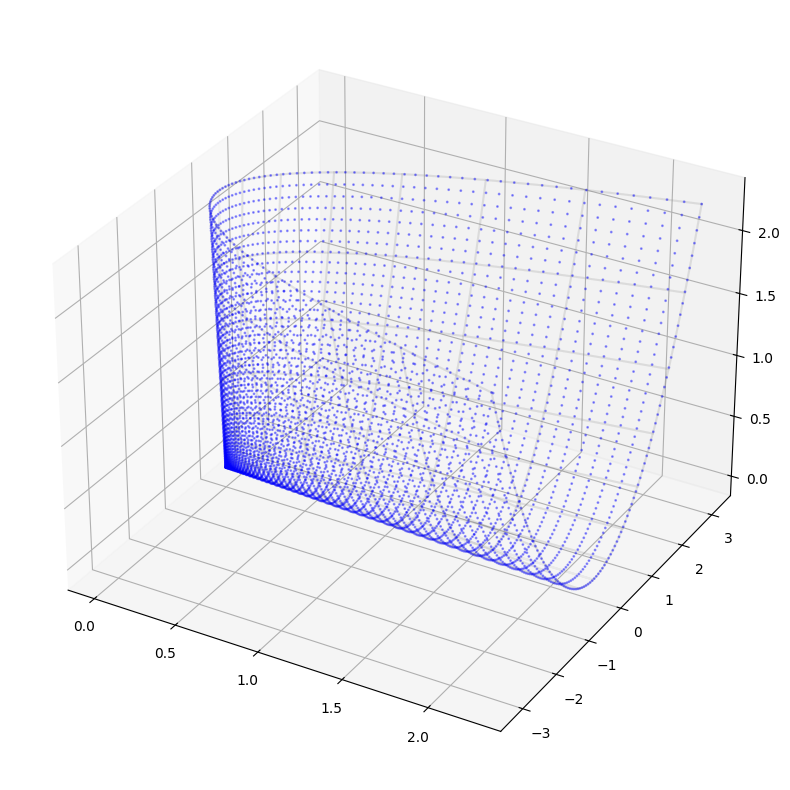

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# Generating dataset - exactly the same as the one in classes
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y_colors = np.where(y == 0, 'blue', 'red')  # Convert to color names

# Defining phi parametrization
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

# Transforming points from dataset using phi
phi_X = np.array([phi(x) for x in X])

# Generating grid for [-1.5,1.5]²
grid = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(grid, grid)
grid_points = np.vstack([X1.ravel(), X2.ravel()]).T
phi_grid = np.array([phi(x) for x in grid_points])

### Plotting section ###
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting parametrization of [-1.5,1.5]²
ax.scatter(phi_grid[:, 0], phi_grid[:, 1], phi_grid[:, 2],
           c='blue', alpha=0.2, s=1, label='Transformed grid')

# Plotting lines for better visualization of parametrization of [-1.5,1.5]²
for val in np.linspace(-1.5, 1.5, 15):
    # Horizontal lines
    line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

    # Vertical lines
    line = np.array([[val, y] for y in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

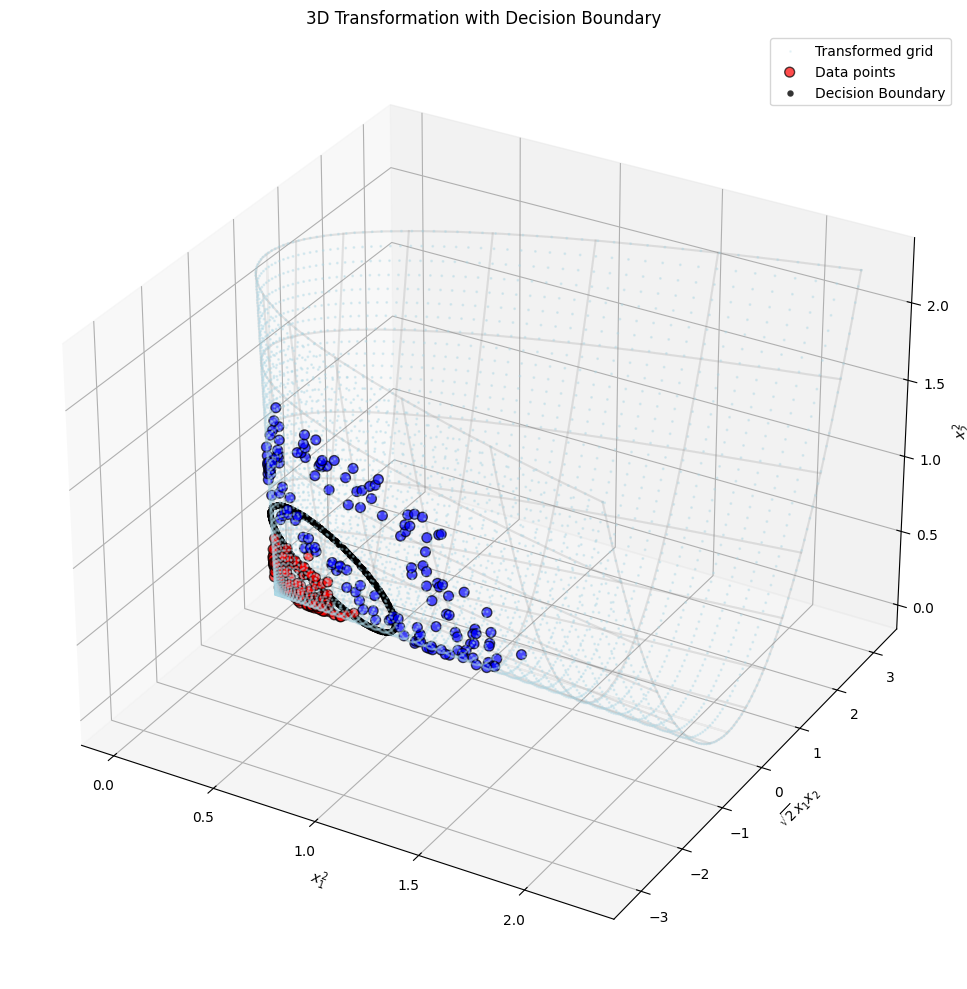

In [35]:
### Ploting section ###
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting parametrization of [-1.5,1.5]²
ax.scatter(phi_grid[:, 0], phi_grid[:, 1], phi_grid[:, 2],
           c='lightblue', alpha=0.2, s=1, label='Transformed grid')

# Plotting lines for better visualization of parametrization of [-1.5,1.5]²
for val in np.linspace(-1.5, 1.5, 15):
    # Horizontal lines
    line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

    # Vertical lines
    line = np.array([[val, y] for y in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

# Plotting points from original dataset
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
           c=y_colors, edgecolors='k', s=50, alpha=0.7, label='Data points')

# Creating grid for decision boundary/function
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Calculating decision function
grid_decision = clf.decision_function(grid_points)

# Finding decision boundary
contour_mask = np.isclose(grid_decision, 0, atol=0.01)
boundary_points = np.array([phi(p) for p in grid_points[contour_mask]])

# Plotting decision boundary
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2],
           c='black', s=20, edgecolors='k', linewidths=0.1,
           alpha=0.8, label='Decision Boundary', zorder=10)
# Labels
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2}x_1x_2$')
ax.set_zlabel('$x_2^2$')
ax.set_title('3D Transformation with Decision Boundary')
ax.legend()
plt.tight_layout()
plt.show()

In [51]:
from matplotlib import animation
from IPython.display import HTML
import os
from matplotlib import animation
from IPython.display import HTML


### Plotting section ###
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting all elements in the same way as previously
ax.scatter(phi_grid[:, 0], phi_grid[:, 1], phi_grid[:, 2],
           c='lightblue', alpha=0.2, s=1, label='Transformed grid')

for val in np.linspace(-1.5, 1.5, 15):
    line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

    line = np.array([[val, y] for y in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
           c=y_colors, edgecolors='k', s=50, alpha=0.7, label='Data points')

ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2],
           c='black', s=20, alpha=0.8, zorder=10, label='Decision boundary')
# Labels
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2}x_1x_2$')
ax.set_zlabel('$x_2^2$')
ax.set_title('3D Transformation with Decision Boundary')
ax.legend()

"""
# This version somehow doesn't transfer to saved version of notebook, however, it works in Colab editor.
# Can be useful as well for visualization

# Adding animation of rotating graph for better visualization
def animate(i):
    ax.view_init(elev=20, azim=i)
    return fig,

ani = animation.FuncAnimation(fig, animate, frames=range(0, 360, 10),
                             interval=50, blit=False)

plt.close()

HTML(ani.to_jshtml())
"""


# Adding animation of rotating graph for better visualization
def rotate(angle):
    ax.view_init(elev=20, azim=angle)

ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 10),  blit=False, interval=120)

# Displaying the animation
plt.close()
HTML(ani.to_html5_video())


**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane, even though we know the classifier’s separating surface is mathematically linear in that space?**

Dzieje się tak, ponieważ nasze dane pochodzą oryginalnie z 2-wymiarowej przestrzeni. Parametryzacja Φ przeprowadza zbiór danych z 2-wymiarowego na 3-wymiarowy, jednak po tym przekształceniu nasz zbiór danych będzie znajdował się na paraboloidzie (możliwej do zdefiniowania dzięki parametryzacji idącej z R^2 w R^3) zanurzonej w 3-wymiarowej przestrzeni.